In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

In [1]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) # for higher accuracy

import jax
import jax.numpy as jnp
import numpy as np

import pylab as plt
import imageio
import os
import numpy as onp
# to install scikit-image: !pip install scikit-image
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd
import time

# Data Dowload
1. Download the "celeba_small.zip" file available on lumiNUS.
This is a 146Mo large zip-file containing 20K face images.
2. Download the attribute file "celeba.csv" available on lumiNUS.
3. Unzip the file "celeba_small.zip" in the directory of your choice. (Data = 175 Mo when uncompressed). 


# Brief Data exploration

In [2]:
#load attributes csv file
path_csv  = "D:\\Academics\\DSA\\4212\\datasets"
# path_csv  = '/content/gdrive/My Drive/DSA4212/datasets' # Google Drive
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))


In [3]:
#let us list all the files in the image directory
path = "D:\\Academics\\DSA\\4212\\datasets\\img_celeba_small"
# path = "/content/gdrive/My Drive/DSA4212/datasets/img_celeba_small" # Google Drive
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

# sort the images by alphabetical order 
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


In [4]:
# Proportion of Males in first 15000? first 200?
train_img = all_img[:15000]
train_attr = attribute.drop(columns=['Filename' ,'Male'])[:15000]
train_label = attribute['Male'][:15000]
train_label = np.array(train_label).reshape(-1,1)

test_img = all_img[15000:]
test_attr = attribute.drop(columns=['Filename' ,'Male'])[15000:]
test_label = attribute['Male'][15000:]
test_label = np.array(test_label).reshape(-1,1)

train_small_img = all_img[:200]
train_small_attr = attribute.drop(columns=['Filename' ,'Male'])[:200]
train_small_label = attribute['Male'][:200]
train_small_label = np.array(train_small_label).reshape(-1,1)

## Train with Labels (no image)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(random_state=42)
params = {'C':[0.01, 0.1, 1, 2, 5]}

In [6]:
import warnings;
warnings.filterwarnings('ignore');

logreg_cv = GridSearchCV(logreg,params)
logreg_cv.fit(train_attr, train_label)


GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 2, 5]})

In [7]:
logreg_cv.best_score_

0.9344666666666667

In [8]:
test_pred = logreg_cv.predict(test_attr)
test_acc = np.mean(np.array(test_pred == test_label, dtype='int64'))
print(f'Test Accuracy is {test_acc:.2f}')

Test Accuracy is 0.51


In [9]:
coef = logreg_cv.best_estimator_.coef_
coef = pd.DataFrame(np.abs(coef[0]), index=train_attr.keys(), columns=['Coef'])
coef = coef.sort_values(by='Coef',ascending=False)

In [10]:
coef.index[0]

'5_o_Clock_Shadow'

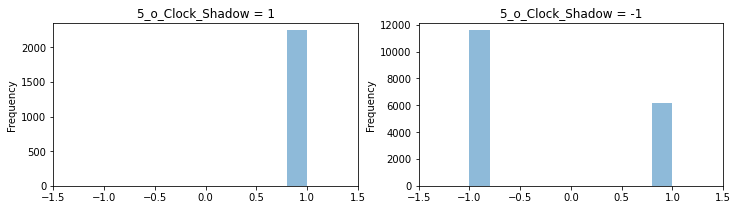

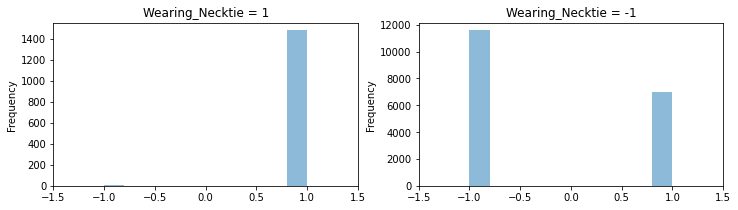

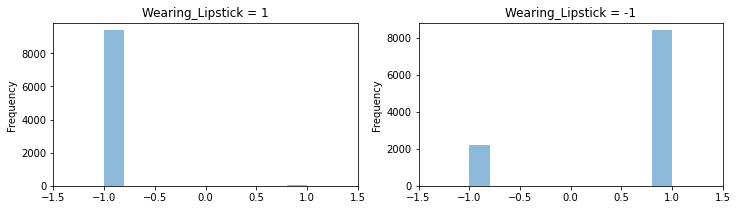

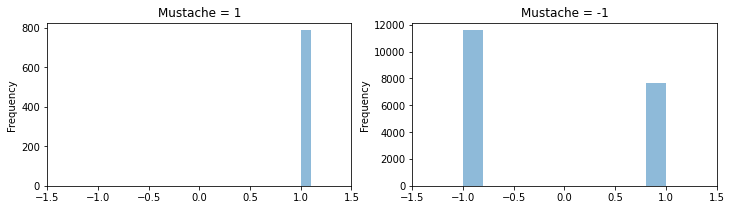

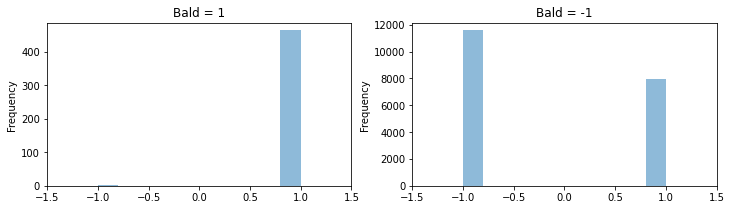

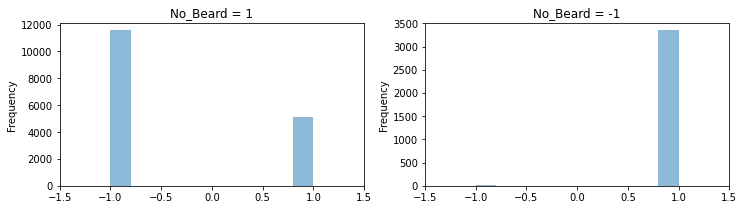

In [11]:
for i in range(6):
    plt.figure(figsize=(12,3))
    attr = coef.index[i]
    title0 = attr + ' = -1'
    title1 = attr + ' = 1'
    plt.subplot(1,2,1)
    attribute[attribute[attr] == 1]['Male'].plot(kind='hist', alpha=0.5, title=title1, xlim=[-1.5,1.5]);
    plt.subplot(1,2,2)
    attribute[attribute[attr] == -1]['Male'].plot(kind='hist', alpha=0.5, title=title0, xlim=[-1.5,1.5]);

In [12]:
coef

,Coef
5_o_Clock_Shadow,2.311386
Wearing_Necktie,1.961697
Wearing_Lipstick,1.871409
Mustache,1.754999
Bald,1.642976
No_Beard,1.636658
Wearing_Earrings,1.455257
Heavy_Makeup,1.323094
Goatee,1.265513
Sideburns,1.003387
